In [14]:
import numpy as np
import pandas as pd

In [2]:
# 读取鸢尾花数据集，header参数来指定标题的行。默认为0。如果没有标题，则使用None。
data = pd.read_csv(r"Iris.csv", header=0)
# 显示前n行记录。默认n的值为5。
# data.head()
# 显示末尾的n行记录。默认n的值为5。
#data.tail()
# 随机抽取样本。默认抽取一条，我们可以通过参数进行指定抽取样本的数量。
# data.sample(10)
# 将类别文本映射成为数值类型。
data["Species"] = data["Species"].map({"Iris-virginica": 0, "Iris-setosa": 1, "Iris-versicolor": 2})
# 删除不需要的Id列。
data.drop("Id", axis=1, inplace=True)
# data.duplicated().any()
# 查看数据集的记录数。
# len(data)
# 删除重复的记录。
data.drop_duplicates(inplace=True)
# len(data)
# 查看各个类别的鸢尾花具有多少条记录。
data["Species"].value_counts()

2    50
0    49
1    48
Name: Species, dtype: int64

In [27]:
class KNN:
    """使用Python语言实现K近邻算法。（实现分类）"""
    
    def __init__(self, k):
        """初始化方法
        
        Parameters
        -----
        k : int
            邻居的个数。
        
        """
        self.k = k
        
    def fit(self, X, y):
        """训练方法
        
        Parameters
        -----
        X : 类数组类型，形状为：[样本数量, 特征数量]
            待训练的样本特征（属性）
        
        y : 类数组类型，形状为： [样本数量]
            每个样本的目标值（标签）。
        """
        
        # 将X转换成ndarray数组类型。
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        
    def predict(self, X):
        """根据参数传递的样本，对样本数据进行预测。
        
        Parameters
        -----
        X : 类数组类型，形状为：[样本数量, 特征数量]
            待训练的样本特征（属性） 
        
        Returns
        -----
        result : 数组类型
            预测的结果。
        
        """
        
        X = np.asarray(X)
        result = []
        # 对ndarray数组进行遍历，每次取数组中的一行。
        for x in X:
            # 对于测试集中的每一个样本，依次与训练集中的所有样本求距离。
            dis = np.sqrt(np.sum((x - self.X) ** 2, axis=1))
            # 返回数组排序后，每个元素在原数组（排序之前的数组）中的索引。
            index = dis.argsort()
            # 进行截断，只取前k个元素。【取距离最近的k个元素的索引】
            index = index[:self.k]
            # 返回数组中每个元素出现的次数。元素必须是非负的整数。
            count = np.bincount(self.y[index])
            # 返回ndarray数组中，值最大的元素对应的索引。该索引就是我们判定的类别。
            # 最大元素索引，就是出现次数最多的元素。
            result.append(count.argmax())
        return np.asarray(result)
    
    def predict2(self, X):
        """根据参数传递的样本，对样本数据进行预测（考虑权重的，使用距离的倒数作为权重）。
        
        Parameters
        -----
        X : 类数组类型，形状为：[样本数量, 特征数量]
            待训练的样本特征（属性） 
        
        Returns
        -----
        result : 数组类型
            预测的结果。
        
        """
        
        X = np.asarray(X)
        result = []
        # 对ndarray数组进行遍历，每次取数组中的一行。
        for x in X:
            # 对于测试集中的每一个样本，依次与训练集中的所有样本求距离。
            dis = np.sqrt(np.sum((x - self.X) ** 2, axis=1))
            # 返回数组排序后，每个元素在原数组（排序之前的数组）中的索引。
            index = dis.argsort()
            # 进行截断，只取前k个元素。【取距离最近的k个元素的索引】
            index = index[:self.k]
            # 返回数组中每个元素出现的次数。元素必须是非负的整数。【使用weights考虑权重，权重为距离的倒数。】
            count = np.bincount(self.y[index], weights=1 / dis[index])
            # 返回ndarray数组中，值最大的元素对应的索引。该索引就是我们判定的类别。
            # 最大元素索引，就是出现次数最多的元素。
            result.append(count.argmax())
        return np.asarray(result)

In [28]:
# 提取出每个类比的鸢尾花数据
t0 = data[data["Species"] == 0]
t1 = data[data["Species"] == 1]
t2 = data[data["Species"] == 2]
# 对每个类别数据进行洗牌。
t0 = t0.sample(len(t0), random_state=0)
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)
# 构建训练集与测试集。
train_X = pd.concat([t0.iloc[:40, :-1], t1.iloc[:40, :-1], t2.iloc[:40, :-1]], axis=0)
train_y = pd.concat([t0.iloc[:40, -1], t1.iloc[:40, -1], t2.iloc[:40, -1]], axis=0)
test_X = pd.concat([t0.iloc[40:, :-1], t1.iloc[40:, :-1], t2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([t0.iloc[40:, -1], t1.iloc[40:, -1], t2.iloc[40:, -1]], axis=0)
# 创建KNN对象，进行训练与测试。
knn = KNN(k=3)
# 进行训练
knn.fit(train_X, train_y)
# 进行测试，获得测试的结果。
result = knn.predict(test_X)
# display(result)
# display(test_y)
display(np.sum(result == test_y))
display(np.sum(result == test_y)/ len(result))

26

0.9629629629629629

In [29]:
# 考虑权重，进行一下测试。
result2 = knn.predict2(test_X)
display(np.sum(result2 == test_y))

26

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [13]:
# 默认情况下，matplotlib不支持中文显示，我们需要进行一下设置。

# 设置字体为黑体，以支持中文显示。
mpl.rcParams["font.family"] = "SimHei"
# 设置在中文字体时，能够正常的显示负号（-）。
mpl.rcParams["axes.unicode_minus"] = False

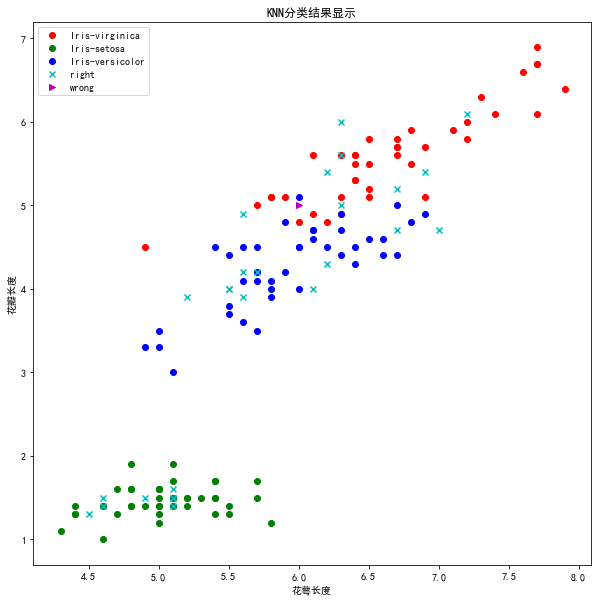

In [20]:
# {"Iris-virginica": 0, "Iris-setosa": 1, "Iris-versicolor": 2})
# 设置画布的大小
plt.figure(figsize=(10, 10))
# 绘制训练集数据
plt.scatter(x=t0["SepalLengthCm"][:40], y=t0["PetalLengthCm"][:40], color="r", label="Iris-virginica")
plt.scatter(x=t1["SepalLengthCm"][:40], y=t1["PetalLengthCm"][:40], color="g", label="Iris-setosa")
plt.scatter(x=t2["SepalLengthCm"][:40], y=t2["PetalLengthCm"][:40], color="b", label="Iris-versicolor")
# 绘制测试集数据
right = test_X[result == test_y]
wrong = test_X[result != test_y]
plt.scatter(x=right["SepalLengthCm"], y=right["PetalLengthCm"], color="c", marker="x", label="right")
plt.scatter(x=wrong["SepalLengthCm"], y=wrong["PetalLengthCm"], color="m", marker=">", label="wrong")
plt.xlabel("花萼长度")
plt.ylabel("花瓣长度")
plt.title("KNN分类结果显示")
plt.legend(loc="best")
plt.show()

In [24]:
np.bincount([0, 1, 1, 0, 1], weights=[0.5, 0.3, 0.2, 0.1, 0.0])

array([0.6, 0.5])